In [1]:
import random
from collections import deque
import itertools

from context import bowman
from bowman import triangulation
from triangulation import Triangulation
from bowman import unfolding
from bowman import rational_ht_application
from bowman import geom_equiv
from bowman import point_orbits

In [2]:
def sigma(m):
    [[a, b], [c, d]] = m
    return matrix([[a, -b], [-c , d]])

In [3]:
def find_parabolic(X, cusp):
    f = X.generators_veech
    parabolics = [g for g in f.gens if abs(g.trace()) == 2]
    p = next(p for p in parabolics if fixed_point_parabolic(p) == cusp)
    if p.trace() == -2:
        p = -p
    return p
        
def fixed_point_parabolic(P):
    [[a, b], [c, d]] = P
    return (a - d) / (2 * c) if c != 0 else oo

In [5]:
def butterfly2(w, h, t, e):
    D = e**2 + 8 * w * h
    if (e + 8 * h)**2 >= D:
        raise ValueError("Butterfly move B_2 is inadmissible")
    e1 = -e - 8*h
    h1 = gcd(2 * h, w + 2 * t) # when h = 1, h1 = 1 or 2 depending on w odd/even 
    
    w1 = (D - e1**2) / (8 * h1)
    
    # have 0 <= t1 < gcd(w1, h1) = 1/2
    # need gcd(w1, h1, t1, e1) = 1
    if gcd(w1, h1) == 1:
        t1 = 0
    else: # if w1 is even and h1 = 2
        t1 = 1
    
    if not all([w1 > 0, h1 > 0, 0 <= t1 < gcd(w1, h1), gcd(gcd(gcd(w1, h1), t1), e1) == 1,
               e1**2 + 8 * w1 * h1 == D, 2 * h1 + e1 < w1]):
        raise ValueError("output prototype does not satisfy (P)")
    
    return w1, h1, t1, e1

In [5]:
def initialize_prym_aplus(D):
    if D % 8 == 0:
        w, h, t, e = D // 8, 1, 0, 0
    elif D % 8 == 1:
        w, h, t, e = (D-1) // 8, 1, 0, -1
    else:
        w, h, t, e = (D-4) // 8, 1, 0, -2
    X = Triangulation.prym_eigenform_type_aplus(w, h, t, e)
    K = QuadraticField(D)
    rtD = K.gen()
    lmbd = (e + rtD)/2
    return X, (w, h, t, e), (K, rtD, lmbd)

In [6]:
def matrix_plus_to_minus(D):
    """compute change of model matrix for a b2 move"""
    _, (w, h, t, e), (K, rtD, lmbd) = initialize_prym_aplus(D)
    w1, h1, t1, e1 = butterfly2(w, h, t, e)
    lmbd1 = (e1 + rtD)/2
    COB_minus_to_plus = 2/lmbd1 * matrix(K, [[w, lmbd], [2, 1]])
    return COB_minus_to_plus^-1

In [7]:
def compute_shear_b2(D):
    """compute the cyl shear in the direction of [w, 2]"""
    _, (w, h, t, e), (K, rtD, lmbd) = initialize_prym_aplus(D)
    w1, h1, t1, e1 = butterfly2(w, h, t, e)
    lmbd1 = (e1 + rtD)/2
    COB_new_to_old = 2/lmbd1 * matrix(K, [[w, lmbd], [2, 1]])
    shear_horiz_new = matrix(K, [[1, lcm(w1/h1, 1)], [0, 1]])
    return COB_new_to_old * shear_horiz_new * COB_new_to_old.inverse()

Disc=17 has B_2 inadmissible

Disc=20 has B_2 inadmissible

Disc=24 has B_2 inadmissible

Disc=28 has B_2 inadmissible

Disc=32 has B_2 inadmissible

Disc=33 has B_2 inadmissible

Disc=40 has B_2 inadmissible

Disc=41 has B_2 inadmissible

disc=44, prototype_old=(5, 1, 0, -2)
prototype_new=(1, 1, 0, -6)


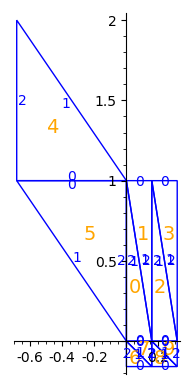

v_ctr_west -> (-1/2, 1)


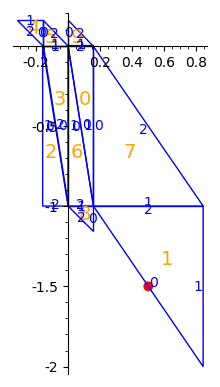


Disc=48 has B_2 inadmissible

disc=52, prototype_old=(6, 1, 0, -2)
prototype_new=(1, 2, 0, -6)


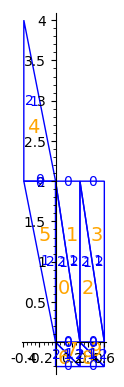

v_ctr_west -> (-1/2, 1)


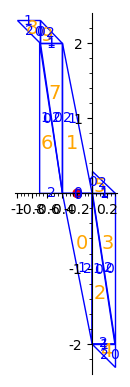


Disc=56 has B_2 inadmissible

disc=57, prototype_old=(7, 1, 0, -1)
prototype_new=(1, 1, 0, -7)


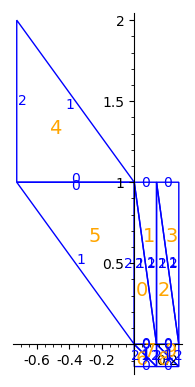

v_ctr_west -> (-1/2, 1)


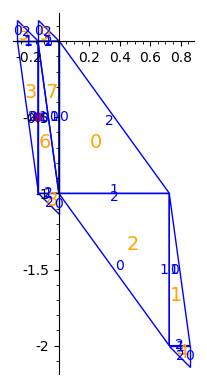


disc=60, prototype_old=(7, 1, 0, -2)
prototype_new=(3, 1, 0, -6)


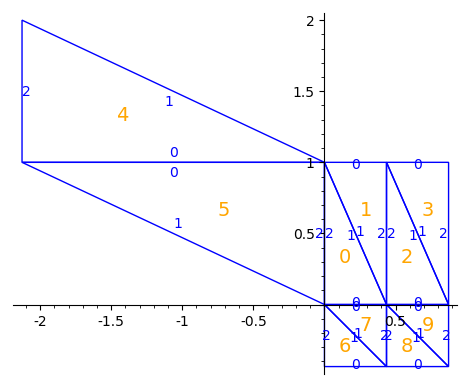

v_ctr_west -> (-1/2, 1)
BROKE

disc=65, prototype_old=(8, 1, 0, -1)
prototype_new=(1, 2, 0, -7)


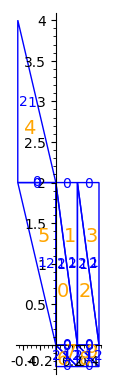

v_ctr_west -> (-1/2, 1)


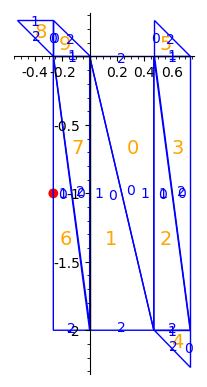


disc=68, prototype_old=(8, 1, 0, -2)
prototype_new=(2, 2, 1, -6)


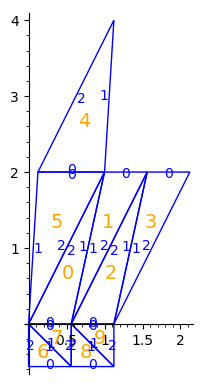

v_ctr_west -> (-1/2, 1)
BROKE

disc=72, prototype_old=(9, 1, 0, 0)
prototype_new=(1, 1, 0, -8)


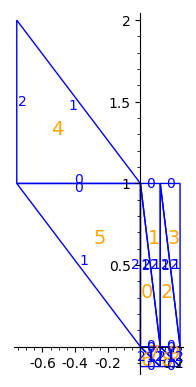

v_ctr_west -> (-1/2, 1)


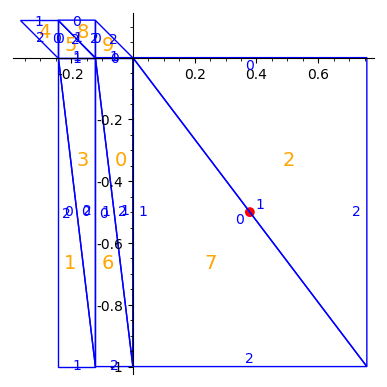


disc=73, prototype_old=(9, 1, 0, -1)
prototype_new=(3, 1, 0, -7)


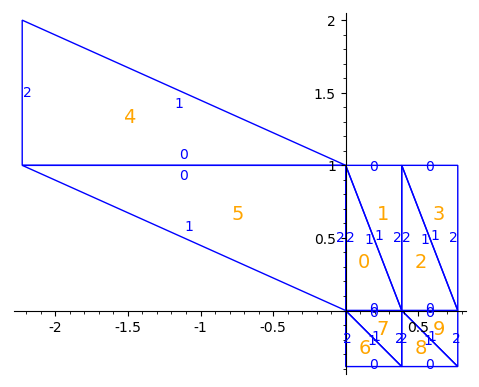

v_ctr_west -> (-1/2, 1)
BROKE

disc=76, prototype_old=(9, 1, 0, -2)
prototype_new=(5, 1, 0, -6)


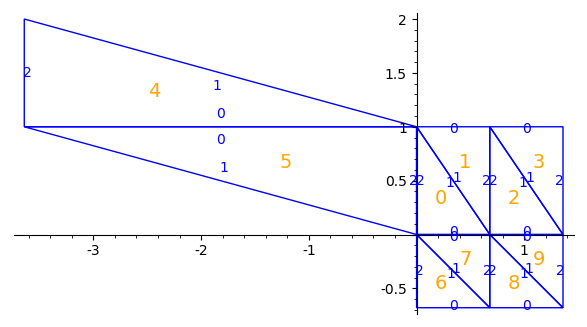

v_ctr_west -> (-1/2, 1)
BROKE

disc=80, prototype_old=(10, 1, 0, 0)
prototype_new=(1, 2, 0, -8)


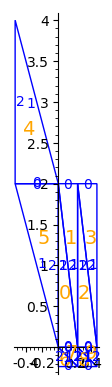

v_ctr_west -> (-1/2, 1)


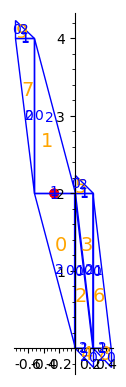


disc=84, prototype_old=(10, 1, 0, -2)
prototype_new=(3, 2, 0, -6)


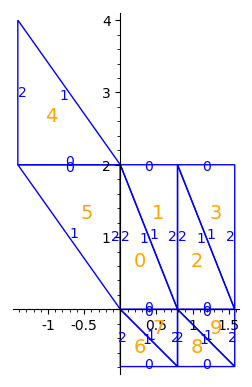

v_ctr_west -> (-1/2, 1)
BROKE

disc=88, prototype_old=(11, 1, 0, 0)
prototype_new=(3, 1, 0, -8)


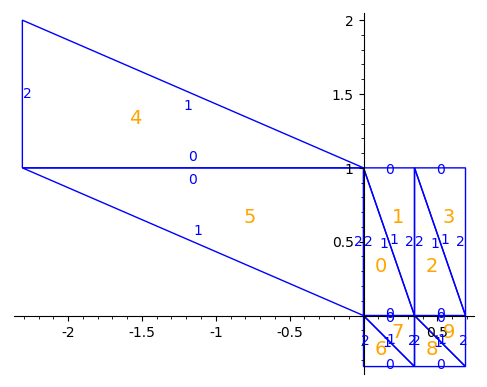

v_ctr_west -> (-1/2, 1)
BROKE

disc=89, prototype_old=(11, 1, 0, -1)
prototype_new=(5, 1, 0, -7)


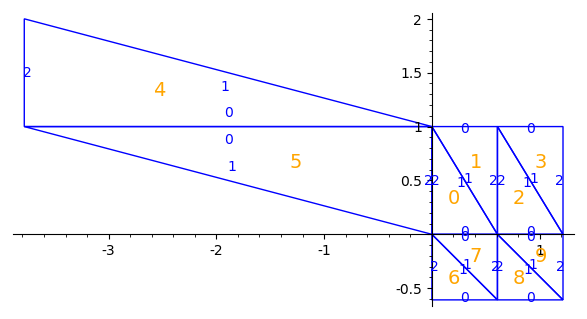

v_ctr_west -> (-1/2, 1)
BROKE

disc=92, prototype_old=(11, 1, 0, -2)
prototype_new=(7, 1, 0, -6)


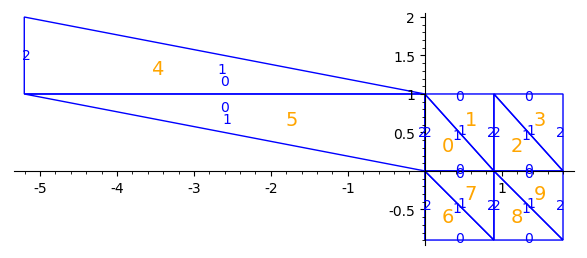

v_ctr_west -> (-1/2, 1)
BROKE

disc=96, prototype_old=(12, 1, 0, 0)
prototype_new=(2, 2, 1, -8)


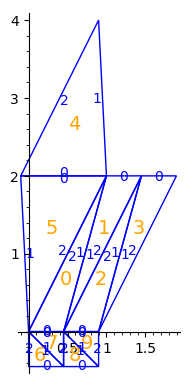

v_ctr_west -> (-1/2, 1)
BROKE

disc=97, prototype_old=(12, 1, 0, -1)
prototype_new=(3, 2, 0, -7)


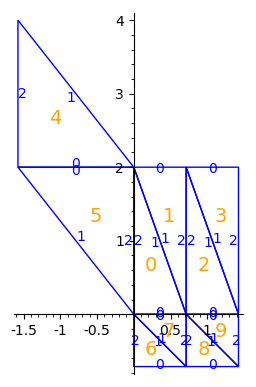

v_ctr_west -> (-1/2, 1)
BROKE

disc=104, prototype_old=(13, 1, 0, 0)
prototype_new=(5, 1, 0, -8)


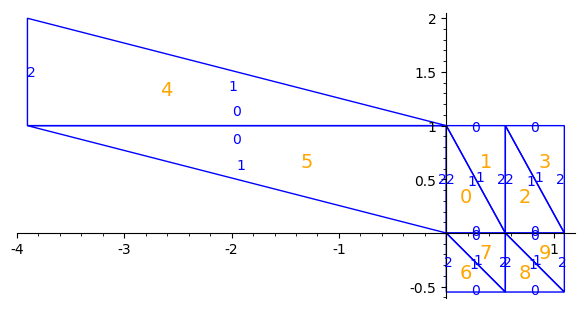

v_ctr_west -> (-1/2, 1)
BROKE

disc=105, prototype_old=(13, 1, 0, -1)
prototype_new=(7, 1, 0, -7)


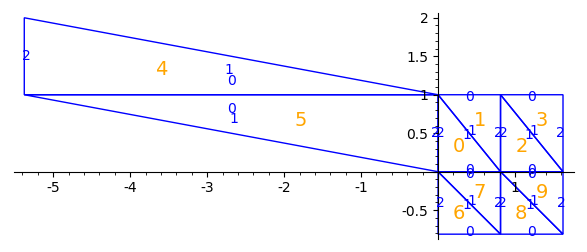

v_ctr_west -> (-1/2, 1)
BROKE

disc=108, prototype_old=(13, 1, 0, -2)
prototype_new=(9, 1, 0, -6)


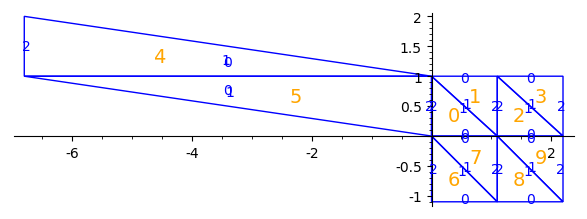

v_ctr_west -> (-1/2, 1)
BROKE

disc=112, prototype_old=(14, 1, 0, 0)
prototype_new=(3, 2, 0, -8)


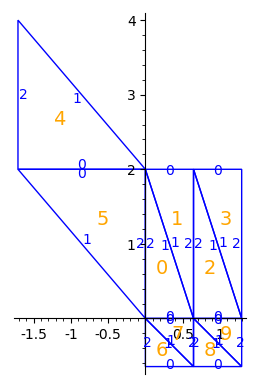

v_ctr_west -> (-1/2, 1)
BROKE

disc=113, prototype_old=(14, 1, 0, -1)
prototype_new=(4, 2, 1, -7)


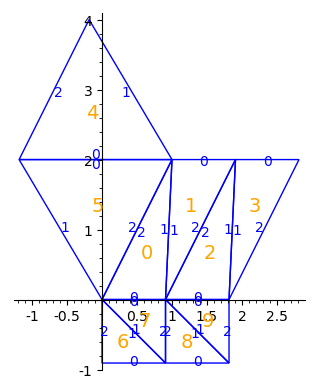

v_ctr_west -> (-1/2, 1)
BROKE

disc=116, prototype_old=(14, 1, 0, -2)
prototype_new=(5, 2, 0, -6)


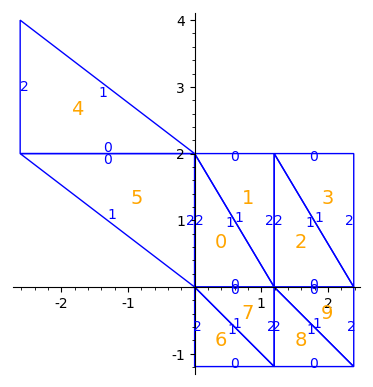

v_ctr_west -> (-1/2, 1)
BROKE

disc=120, prototype_old=(15, 1, 0, 0)
prototype_new=(7, 1, 0, -8)


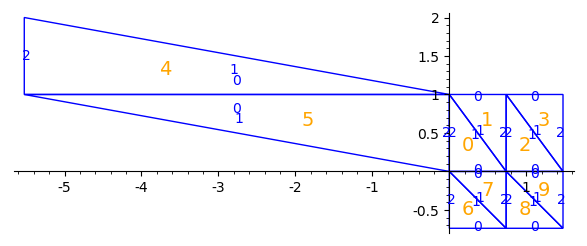

v_ctr_west -> (-1/2, 1)
BROKE

disc=124, prototype_old=(15, 1, 0, -2)
prototype_new=(11, 1, 0, -6)


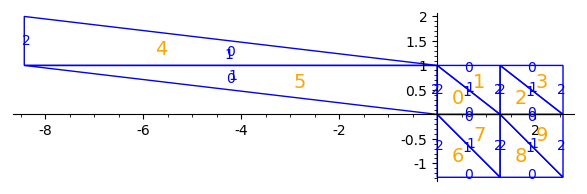

v_ctr_west -> (-1/2, 1)
BROKE

disc=128, prototype_old=(16, 1, 0, 0)
prototype_new=(4, 2, 1, -8)


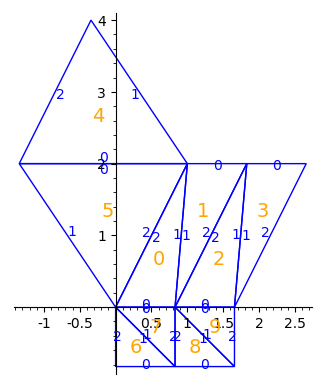

v_ctr_west -> (-1/2, 1)
BROKE

disc=129, prototype_old=(16, 1, 0, -1)
prototype_new=(5, 2, 0, -7)


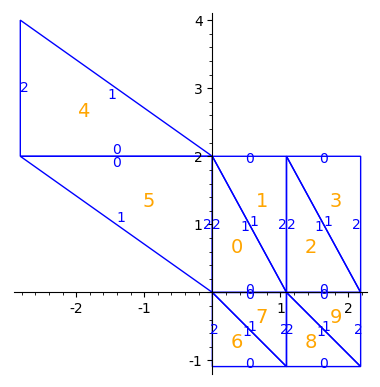

v_ctr_west -> (-1/2, 1)
BROKE

disc=132, prototype_old=(16, 1, 0, -2)
prototype_new=(6, 2, 1, -6)


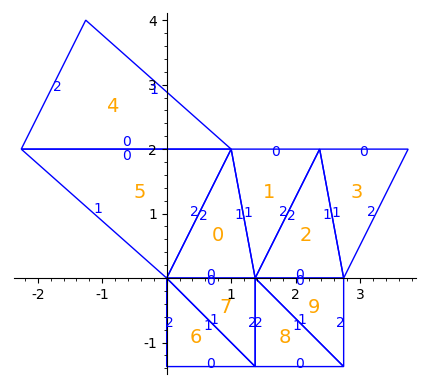

v_ctr_west -> (-1/2, 1)
BROKE

disc=136, prototype_old=(17, 1, 0, 0)
prototype_new=(9, 1, 0, -8)


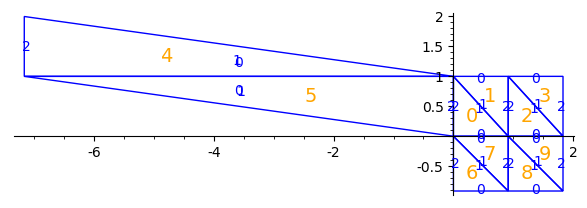

v_ctr_west -> (-1/2, 1)
BROKE

disc=137, prototype_old=(17, 1, 0, -1)
prototype_new=(11, 1, 0, -7)


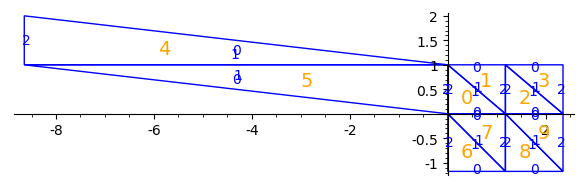

v_ctr_west -> (-1/2, 1)
BROKE

disc=140, prototype_old=(17, 1, 0, -2)
prototype_new=(13, 1, 0, -6)


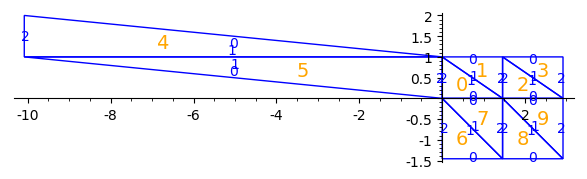

v_ctr_west -> (-1/2, 1)
BROKE

disc=145, prototype_old=(18, 1, 0, -1)
prototype_new=(6, 2, 1, -7)


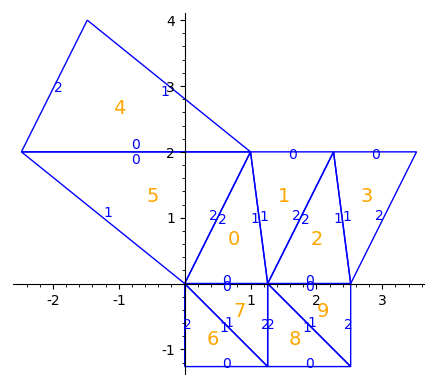

v_ctr_west -> (-1/2, 1)
BROKE

disc=148, prototype_old=(18, 1, 0, -2)
prototype_new=(7, 2, 0, -6)


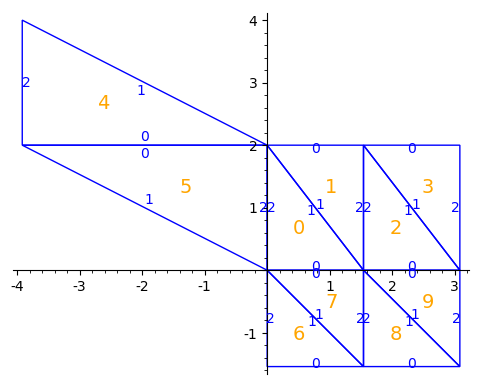

v_ctr_west -> (-1/2, 1)
BROKE

disc=152, prototype_old=(19, 1, 0, 0)
prototype_new=(11, 1, 0, -8)


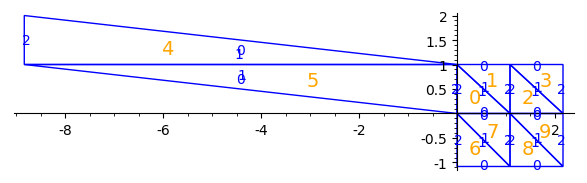

v_ctr_west -> (-1/2, 1)
BROKE

disc=153, prototype_old=(19, 1, 0, -1)
prototype_new=(13, 1, 0, -7)


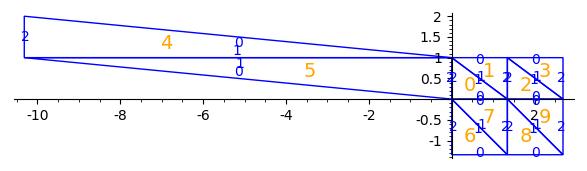

v_ctr_west -> (-1/2, 1)
BROKE

disc=156, prototype_old=(19, 1, 0, -2)
prototype_new=(15, 1, 0, -6)


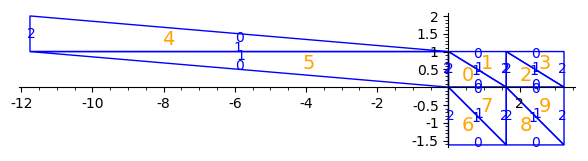

v_ctr_west -> (-1/2, 1)
BROKE

disc=160, prototype_old=(20, 1, 0, 0)
prototype_new=(6, 2, 1, -8)


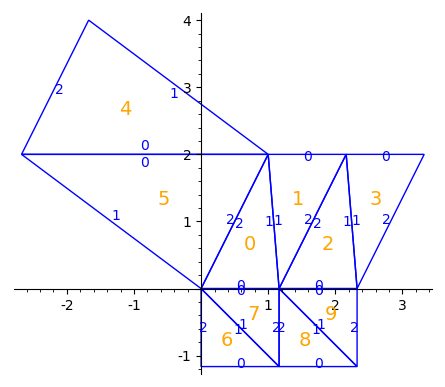

v_ctr_west -> (-1/2, 1)
BROKE

disc=161, prototype_old=(20, 1, 0, -1)
prototype_new=(7, 2, 0, -7)


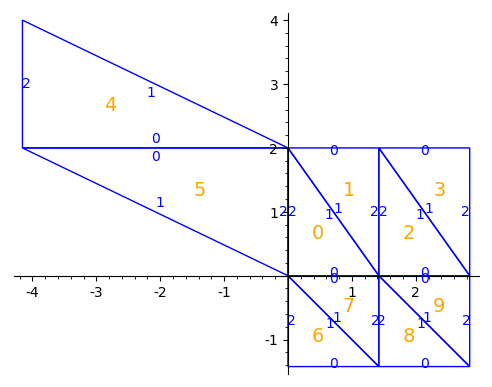

v_ctr_west -> (-1/2, 1)
BROKE

disc=164, prototype_old=(20, 1, 0, -2)
prototype_new=(8, 2, 1, -6)


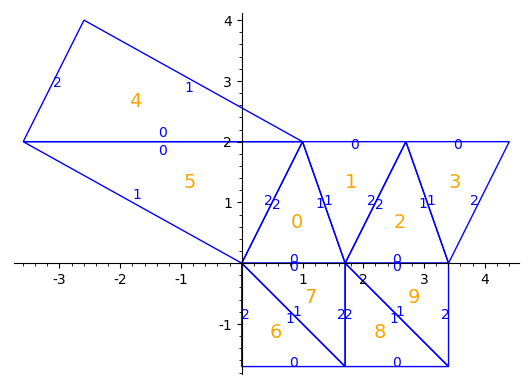

v_ctr_west -> (-1/2, 1)
BROKE

disc=168, prototype_old=(21, 1, 0, 0)
prototype_new=(13, 1, 0, -8)


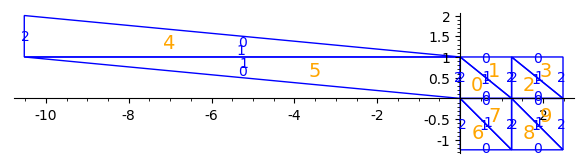

v_ctr_west -> (-1/2, 1)
BROKE

disc=172, prototype_old=(21, 1, 0, -2)
prototype_new=(17, 1, 0, -6)


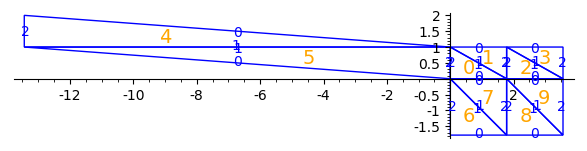

v_ctr_west -> (-1/2, 1)
BROKE

disc=176, prototype_old=(22, 1, 0, 0)
prototype_new=(7, 2, 0, -8)


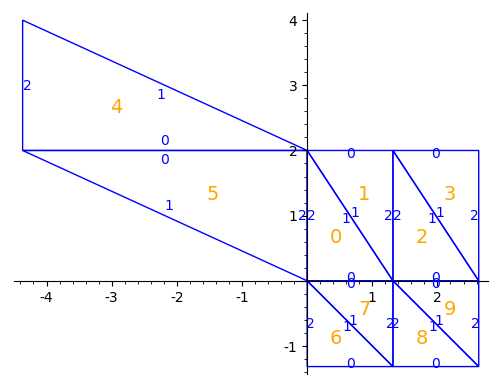

v_ctr_west -> (-1/2, 1)
BROKE

disc=177, prototype_old=(22, 1, 0, -1)
prototype_new=(8, 2, 1, -7)


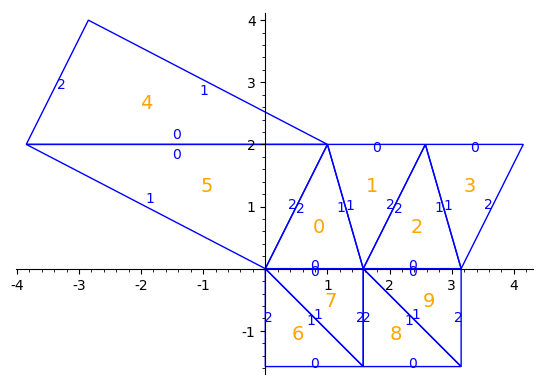

v_ctr_west -> (-1/2, 1)
BROKE

disc=180, prototype_old=(22, 1, 0, -2)
prototype_new=(9, 2, 0, -6)


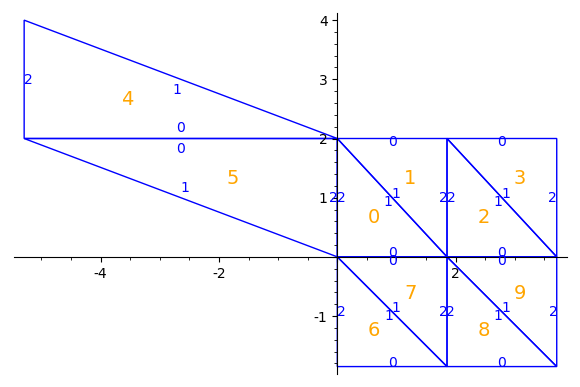

v_ctr_west -> (-1/2, 1)
BROKE

disc=184, prototype_old=(23, 1, 0, 0)
prototype_new=(15, 1, 0, -8)


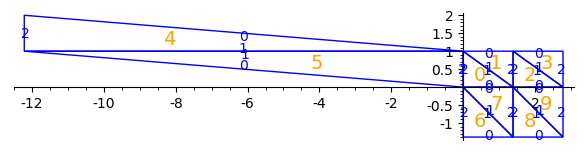

v_ctr_west -> (-1/2, 1)
BROKE

disc=185, prototype_old=(23, 1, 0, -1)
prototype_new=(17, 1, 0, -7)


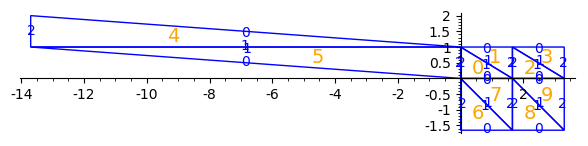

v_ctr_west -> (-1/2, 1)
BROKE

disc=188, prototype_old=(23, 1, 0, -2)
prototype_new=(19, 1, 0, -6)


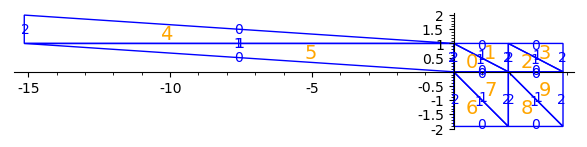

v_ctr_west -> (-1/2, 1)
BROKE

disc=192, prototype_old=(24, 1, 0, 0)
prototype_new=(8, 2, 1, -8)


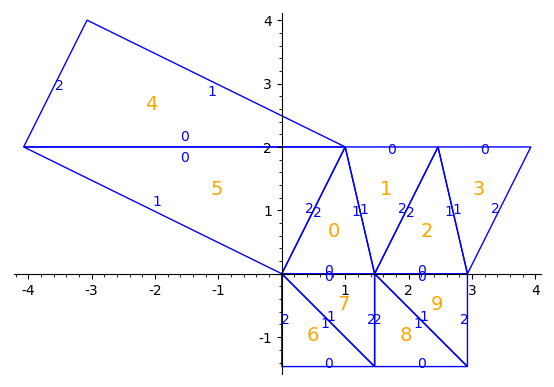

v_ctr_west -> (-1/2, 1)
BROKE

disc=193, prototype_old=(24, 1, 0, -1)
prototype_new=(9, 2, 0, -7)


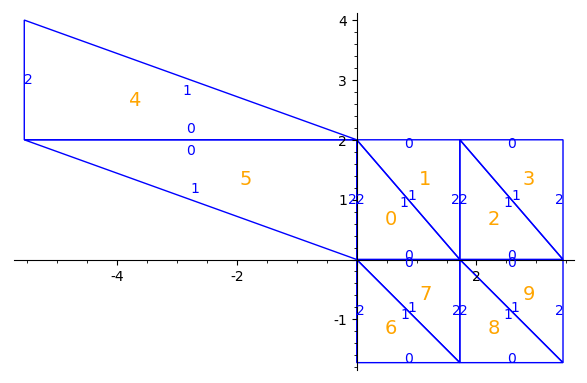

v_ctr_west -> (-1/2, 1)
BROKE



In [12]:
# transform periods bw the fixed points
for D in [D for D in range(17, 200) if not ZZ(D).is_square() and (D % 8) in [0, 1, 4]]:
    prym_aplus, (w, h, t, e), (K, rtD, lmbd) = initialize_prym_aplus(D)
    
    if (e + 8 * h)**2 < D:
        (w1, h1, t1, e1) = butterfly2(w, h, t, e)
        lmbd1 = (e1 + rtD)/2
        print(f"disc={D}, prototype_old={(w, h, t, e)}")
        print(f"prototype_new={(w1, h1, t1, e1)}")
        prym_aminus = Triangulation.prym_eigenform_type_aminus(w1, h1, t1, e1)
        prym_aminus.plot().show()
    else:
        print(f"Disc={D} has B_2 inadmissible\n")
        continue
        
    m = matrix_plus_to_minus(D)
    v_ctr_west = vector(K, [-lmbd/2, 0])
    print(f"v_ctr_west -> {m * v_ctr_west}")
    prym_aplus = prym_aplus.mark_point(0, (0, .5, .5), (1, 0, 0))
    try:
        prym_aplus.apply_matrix(m).make_delaunay(equiv_trin=prym_aminus).plot().show()
    except ValueError:
        print("BROKE")
    print("")

In [11]:
# find the third shear experimentally and theoretically
for D in [D for D in range(17, 200) if not ZZ(D).is_square() and (D % 8) in [0, 1, 4]]:
    X, (w, h, t, e), (K, rtD, lmbd) = initialize_prym_aplus(D)
    
    if (e + 8 * h)**2 < D:
        (w1, h1, t1, e1) = butterfly2(w, h, t, e)
        print(f"disc={D}, prototype_old={(w, h, t, e)}")
        print(f"prototype_new={(w1, h1, t1, e1)}")
    else:
        print(f"Disc={D} has B_2 inadmissible\n")
        continue
        
    # shear_vert = 1/2w (rtD + 2w - e)
    # (w - e - 2)*invmod(V1) = invmod(V2)
        
    # clean up the parabolic fixing the cusp in H 
    p = find_parabolic(X, K(w/2))
    shear_horiz_old = matrix(K, [[1, w], [0, 1]])
    p = shear_horiz_old.inverse() * p * shear_horiz_old
    assert sigma(p) * vector(K, [w, 2]) == vector(K, [w, 2]) # Veech elt fixes cyl dir [w, 2]
    cusp_to_infty = matrix(K, [[0, 1], [1, w/2]])
    p_conjugated = cusp_to_infty * p * cusp_to_infty.inverse()
    if p_conjugated[0][1] < 0:
        p = p.inverse()
    
    shear_new = compute_shear_b2(D)
    
    if p != sigma(shear_new):
        print("shears don't match :(")
        print(f"p=\n{p}")
        print(f"sigma(shear_new)=\n{sigma(shear_new)}")
        assert False
    else:
        print("shears matched!")
    print("")

Disc=17 has B_2 inadmissible

Disc=20 has B_2 inadmissible

Disc=24 has B_2 inadmissible

Disc=28 has B_2 inadmissible

Disc=32 has B_2 inadmissible

Disc=33 has B_2 inadmissible

Disc=40 has B_2 inadmissible

Disc=41 has B_2 inadmissible

disc=44, prototype_old=(5, 1, 0, -2)
prototype_new=(1, 1, 0, -6)
shears matched!

Disc=48 has B_2 inadmissible

disc=52, prototype_old=(6, 1, 0, -2)
prototype_new=(1, 2, 0, -6)
shears matched!

Disc=56 has B_2 inadmissible

disc=57, prototype_old=(7, 1, 0, -1)
prototype_new=(1, 1, 0, -7)
shears matched!

disc=60, prototype_old=(7, 1, 0, -2)
prototype_new=(3, 1, 0, -6)
shears matched!

disc=65, prototype_old=(8, 1, 0, -1)
prototype_new=(1, 2, 0, -7)
shears matched!

disc=68, prototype_old=(8, 1, 0, -2)
prototype_new=(2, 2, 1, -6)
shears matched!

disc=72, prototype_old=(9, 1, 0, 0)
prototype_new=(1, 1, 0, -8)
shears matched!

disc=73, prototype_old=(9, 1, 0, -1)
prototype_new=(3, 1, 0, -7)
shears matched!

disc=76, prototype_old=(9, 1, 0, -2)
prototyp

KeyboardInterrupt: 

# D = 72

In [23]:
# initialize surface
prym72_aplus, (w, h, t, e), (K72, rt72, lmbd72) = initialize_prym_aplus(72)
shear_horiz = matrix(K72, [[1, w], [0, 1]])
shear_vert = matrix(K72, [[1, 0], [1/(2*w) * (rt72 + 2*w - e), 1]])
shear_b2 = compute_shear_b2(72)
mult_v1 = w + e - 2
assert mult_v1 == 7

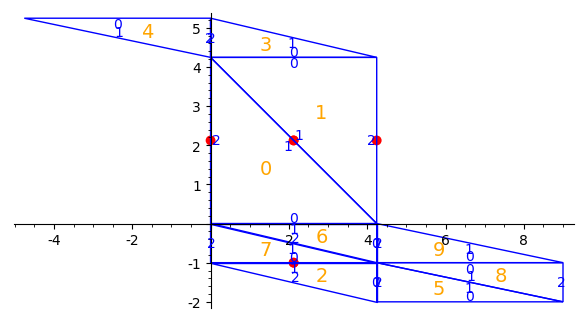

In [24]:
# plot A+ fixed points
fps = [(0, (0, .5, .5)),
      (0, (.5, 0, .5)),
      (2, (0, .5, .5))]

for tri, coords in fps:
    prym72_aplus = prym72_aplus.mark_point(tri, coords, (1, 0, 0))
prym72_aplus.plot()    

# for this one example:
# center -> center
# west -> west
# north -> north 

1 1 0 -8


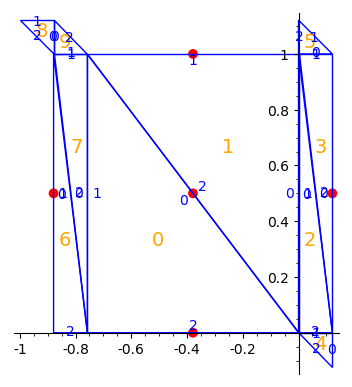

In [29]:
# Change model A+ -> A-
w1, h1, t1, e1 = butterfly2(w, h, t, e)
print(w1, h1, t1, e1)
lmbd1_72 = (e1 + rt72)/2
COB_minus_plus = (2/lmbd1_72) *  matrix(K72, [[w, lmbd72], [2, 1]])
COB_plus_minus = COB_minus_plus^-1
prym72_aminus = Triangulation.prym_eigenform_type_aminus(w1, h1, t1, e1)
prym72_aplus.apply_matrix(COB_plus_minus).make_delaunay(equiv_trin=prym72_aminus).plot()

In [36]:
vAtoB = vector(K72, [-lmbd72 / 2, 0])
COB_plus_minus * vAtoB

(-1/2, 1)

# D = 8

## With fake cone points: 

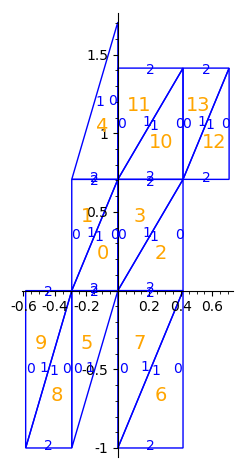

In [3]:
prym8_fake = Triangulation.prym_eigenform_type_b_disc_8_fake()
prym8_fake.plot().show()
k.<a> = QuadraticField(8)
shear_horiz = matrix(k, [[1, 1], [0, 1]])
shear_vert = matrix(k, [[1, 0], [a + 3, 1]])

In [ ]:
segments = rational_ht_application.bicuspid_segments(prym8_fake)
constraints_dict = rational_ht_application.segments_for_plotting(segments)

In [ ]:
prym8_fake_con = prym8_fake.plot_constraints(constraints_dict)
prym8_fake_con.plot().show()

In [ ]:
prym8_fake = prym8_fake.mark_point(0, (1, 0, 0), (1, 0, 0))
for tri in prym8_fake.triangles:
    print(tri.points_marked)
prym8_fake.plot()

In [ ]:
idx_old, coords_old = 0, (1, 0, 0)
for _ in range(50):
    m = sigma(g1) if random.randint(0, 1) == 0 else sigma(g2)
    _, idx_new, coords_new = prym8_fake.track_marked_point(coords_old, idx_old, m)
    prym8_fake = prym8_fake.mark_point(idx_new, coords_new, (1, 0, 0))
    prym8_fake.plot().show()
    idx_old, coords_old = idx_new, coords_new

## with real cone points:

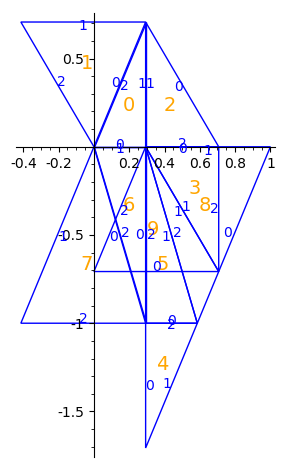

In [3]:
prym8_real = Triangulation.prym_eigenform_type_b_disc_8_real()
K.<a> = QuadraticField(8)
prym8_real.plot().show()

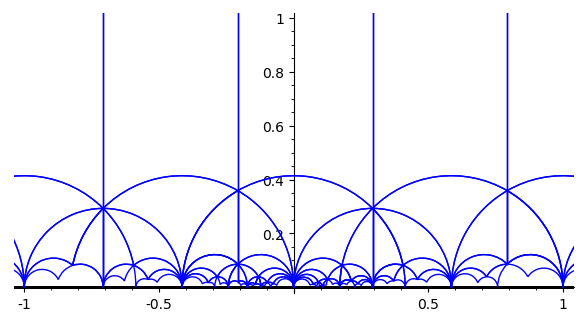

In [4]:
cx = prym8_real.iso_delaunay_complex(100)
sum(r.plot() for r in cx).show(ymax=1, xmin=-1, xmax=1)

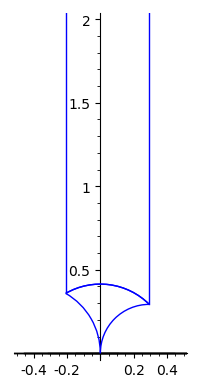

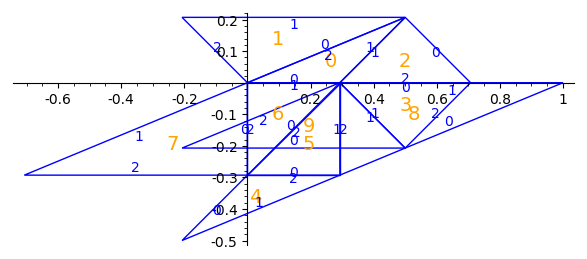

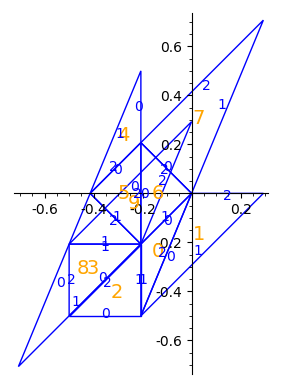

In [43]:
fund_dom = prym8_real.generators_veech
sum(r.plot() for r in fund_dom.idrs).show(xmin=-0.5, xmax=0.5, ymax=2)
y, xinv = fund_dom.gens
x = xinv^-1

p4 = -a/4 + 1, -a/4 + 1
m_4 = matrix(K, [[1, -a/4 + 1], [0, -a/4 + 1]])
prym8_real_sheared4 = prym8_real.apply_matrix(m_4).make_delaunay()
prym8_real_sheared4.plot().show()
prym8_real_sheared4.apply_matrix(m_4 * sigma(y) * m_4^-1).make_delaunay().plot().show()


In [6]:
h = x * y
v = y * x
h, v

(
[-1  1]  [    -1      0]
[ 0 -1], [-a - 3     -1]
)

In [7]:
v0, v1, v2 = prym8_real.triangles[9]
t_north = (-v2 * v0) / (v0 * v0)
idx_north, coord_north = 9, (1 - t_north, t_north, 0)

v0, v1, v2 = prym8_real.triangles[7]
t_south = (-v1 * v2) / (v2 * v2)
idx_south, coord_south = 7, (t_south, 0, 1-t_south)

In [8]:
def mark_points(trin, points_set, rgbcolor=(1, 0, 0)):
    trin_copy = trin
    for tri_id, pt_coords in points_set:
        trin_copy = trin_copy.mark_point(tri_id, pt_coords, rgbcolor)
    return trin_copy

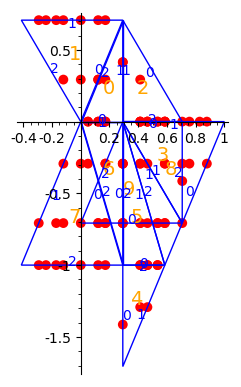

{(2, (1/2*a - 1, 0, -1/2*a + 2)), (4, (0, 1/2*a - 1, -1/2*a + 2)), (6, (1/4*a, -1/4*a + 1, 0)), (9, (1/2*a - 1, 0, -1/2*a + 2)), (9, (-1/2*a + 2, 1/2*a - 1, 0)), (8, (0, a - 2, -a + 3)), (8, (1/4*a, 3/4*a - 2, -a + 3)), (8, (-1/4*a + 1, 5/4*a - 3, -a + 3)), (1, (-1/2*a + 2, 5/2*a - 7, -2*a + 6)), (6, (-1/4*a + 1, -1/4*a + 1, 1/2*a - 1)), (5, (1/4*a, 0, -1/4*a + 1)), (8, (-1/4*a + 1, 1/4*a, 0)), (7, (-1/2*a + 2, 0, 1/2*a - 1)), (7, (a - 2, 0, -a + 3)), (7, (1/2*a - 1, -1/4*a + 1, -1/4*a + 1)), (7, (-a + 3, 0, a - 2)), (2, (-1/2*a + 2, 0, 1/2*a - 1)), (6, (0, -1/2*a + 2, 1/2*a - 1)), (7, (-1/2*a + 2, -1/4*a + 1, 3/4*a - 2)), (5, (-1/2*a + 2, 1/2*a - 1, 0)), (7, (0, -1/4*a + 1, 1/4*a)), (7, (3/2*a - 4, 1/4*a, -7/4*a + 5)), (0, (a - 2, -a + 3, 0)), (4, (-a + 3, 0, a - 2)), (6, (0, 1/2*a - 1, -1/2*a + 2)), (1, (-1/2*a + 2, 3/2*a - 4, -a + 3)), (9, (-a + 3, a - 2, 0)), (1, (0, -1/2*a + 2, 1/2*a - 1)), (8, (1/4*a, -1/4*a + 1, 0)), (3, (1/4*a, -1/4*a + 1, 0)), (7, (1/2*a - 1, 0, -1/2*a + 2)), 

In [9]:
pts = {(1, (0, -1/2*a + 2, 1/2*a - 1)), (7, (-1/2*a + 2, 0, 1/2*a - 1)),
       (8, (0, 1/2*a - 1, -1/2*a + 2)), (9, (-1/2*a + 2, 1/2*a - 1, 0))}
for word in [sigma(x^k * y^ell) for k in range(3) for ell in range(4)]:
    pts_new = set()
    for idx, coord in pts:
        idx1, coord1 = prym8_real.track_marked_point(coord, idx, word)
        if (idx1, coord1) not in pts:
            pts_new.add((idx1, coord1))
    pts |= pts_new
mark_points(prym8_real, pts).plot().show()
print(pts)

The veech element 0  is:
 [        -1  1/2*a - 1]
[-1/2*a - 1          0]
The number of preserved points are:  50
The veech element 1  is:
 [         0  1/2*a - 1]
[-1/2*a - 1     -1/2*a]
The number of preserved points are:  26
The veech element 0  is:
 [        -1  1/2*a - 1]
[-1/2*a - 1          0]
The number of preserved points are:  22
The veech element 1  is:
 [         0  1/2*a - 1]
[-1/2*a - 1     -1/2*a]
The number of preserved points are:  14
The veech element 0  is:
 [        -1  1/2*a - 1]
[-1/2*a - 1          0]
The number of preserved points are:  10
The veech element 1  is:
 [         0  1/2*a - 1]
[-1/2*a - 1     -1/2*a]
The number of preserved points are:  0


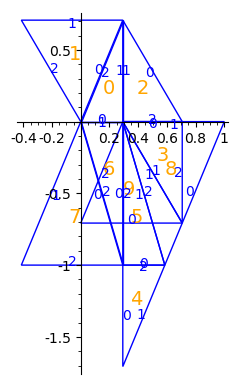

In [12]:
preserved_points = point_orbits.reduce_periodic_points(prym8_real, pts, [sigma(x), sigma(y)], debug=True)
preserved_points = point_orbits.reduce_periodic_points(prym8_real, preserved_points, [sigma(x), sigma(y)], debug=True)
preserved_points = point_orbits.reduce_periodic_points(prym8_real, preserved_points, [sigma(x), sigma(y)], debug=True)
mark_points(prym8_real, preserved_points).plot().show()

# Testing A_plus(9, 1, 0, 0)

In [5]:
w, e = 9, 0
D = e**2 + 8 * w * 1
K.<a> = QuadraticField(D)
lmbd = (e + a)/2

In [7]:
w1, e1 = 1, -8
lmbd1 = (e1 + a)/2

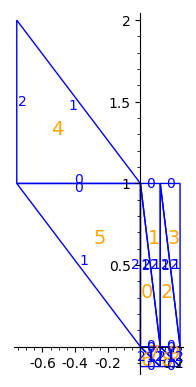

In [17]:
prym_plus = Triangulation.prym_eigenform_type_aplus(w, 1, 0, e)
prym_minus = Triangulation.prym_eigenform_type_aminus(w1, 1, 0, e1)
prym_minus.plot()

In [12]:
imod_v_fat = 1/(w1 - lmbd1)
imod_v_skinny = (2 + lmbd1)/lmbd1
(7 * imod_v_fat) == imod_v_skinny

True

In [175]:
sq0 = vector(K, (-lmbd/2, -lmbd/2))
sq1 = sq0 + vector(K, (lmbd, 0))
sq2 = sq1 + vector(K, (0, lmbd))
sq3 = sq2 - vector(K, (lmbd, 0))
r0 = sq3 - vector(K, (w - lmbd, 0))
r1 = r0 + vector(K, (w, 0))
r2 = r1 + vector(K, (0, h))
r3 = r2 - vector(K, (w, 0))

aux_bottom = vector(K, (-lmbd/2 - w/2, lmbd/2))
aux_right = vector(K, (lmbd/2, lmbd/2 + 2 * (lmbd/w)))
aux_top = aux_bottom + vector(K, (0, 1))
aux_left = aux_right + vector(K, (-w, 0))

midpt_top = (r3 + r2)/2
midpt_bottom = (r0 + r1)/2

cone_pt_top = sq3 + vector(K, (0, 1))

points = [point(cone_pt_top, size=25), point(sq3, size=25)]

In [176]:
# lines for cyl_small
l1 = line([r0, midpt_top], color='red')
l2 = line([midpt_bottom, r2], color='red')
l3 = line([sq3, aux_right], color='red')
l4 = line([aux_bottom, cone_pt_top], color='red')
l5 = line([aux_left, aux_top], color='red')

lines = [l1, l2, l3, l4, l5]

In [177]:
sq = polygon([sq0, sq1, sq2, sq3], fill=False)
r = polygon([r0, r1, r2, r3], fill=False)

cyl_small1 = polygon([aux_left, aux_top, r3], color='green')
cyl_small2 = polygon([r0, aux_bottom, cone_pt_top, midpt_top], color='green')
cyl_small3 = polygon([midpt_bottom, sq3, aux_right, r2], color='green')
cyl_small = [cyl_small1, cyl_small2, cyl_small3]

gons = [sq, r, *cyl_small]

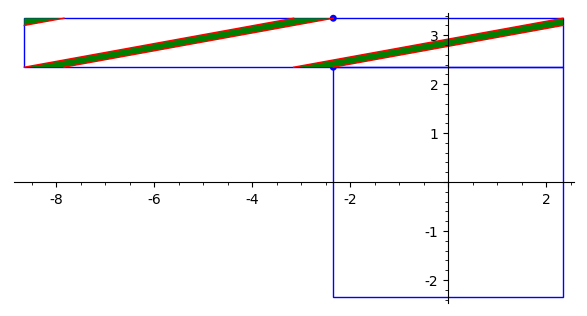

In [178]:
sum([*points, *lines, *gons]).plot()

# A_minus(1, 1, 0, -8) Butterfly Move 

In [11]:
w, e = 1, -8
K.<a> = QuadraticField(72)
lmbd = (e + a)/2
RR(lmbd)

0.242640687119286

In [3]:
r0 = sq3 - vector(K, (w - lmbd, 0))
r1 = r0 + vector(K, (w, 0))
r2 = r1 + vector(K, (0, h))
r3 = r2 - vector(K, (w, 0))

r = polygon([r0, r1, r2, r3], fill=False)

NameError: name 'r0' is not defined

# Which surfaces admit Model B presentations?

In [43]:
w = 1
h = 1
t = 0
e = 0
D = e^2 + 8*w*h
print(D)

lb, ub = (e + sqrt(D)) / 4, (e + sqrt(D)) / 2 
print(RR(lb), w, RR(ub))

assert w > 0 and h > 0 and 0 <= t < gcd(w, h)
assert gcd([w, h, t, e]) == 1
assert 0 < lb < w < ub
assert D % 8 in [0, 1, 4]

8
0.707106781186548 1 1.41421356237310


In [94]:
generated = set()
for e in range(40):
    lb = 2*(e + sqrt(2*e + 1) + 1)
    ub = 4*(e + 2*sqrt(2*e + 1) + 2)
    for D in range(ceil(lb), ceil(ub)):
        if D % 8 == 0:
            w = D / 8
            h = 1
            t = 0
            generated.add((D, (w, h, t, e)))

sorted(generated)

[(8, (1, 1, 0, 0)),
 (8, (1, 1, 0, 1)),
 (16, (2, 1, 0, 1)),
 (16, (2, 1, 0, 2)),
 (16, (2, 1, 0, 3)),
 (16, (2, 1, 0, 4)),
 (24, (3, 1, 0, 1)),
 (24, (3, 1, 0, 2)),
 (24, (3, 1, 0, 3)),
 (24, (3, 1, 0, 4)),
 (24, (3, 1, 0, 5)),
 (24, (3, 1, 0, 6)),
 (24, (3, 1, 0, 7)),
 (32, (4, 1, 0, 2)),
 (32, (4, 1, 0, 3)),
 (32, (4, 1, 0, 4)),
 (32, (4, 1, 0, 5)),
 (32, (4, 1, 0, 6)),
 (32, (4, 1, 0, 7)),
 (32, (4, 1, 0, 8)),
 (32, (4, 1, 0, 9)),
 (32, (4, 1, 0, 10)),
 (40, (5, 1, 0, 3)),
 (40, (5, 1, 0, 4)),
 (40, (5, 1, 0, 5)),
 (40, (5, 1, 0, 6)),
 (40, (5, 1, 0, 7)),
 (40, (5, 1, 0, 8)),
 (40, (5, 1, 0, 9)),
 (40, (5, 1, 0, 10)),
 (40, (5, 1, 0, 11)),
 (40, (5, 1, 0, 12)),
 (40, (5, 1, 0, 13)),
 (48, (6, 1, 0, 5)),
 (48, (6, 1, 0, 6)),
 (48, (6, 1, 0, 7)),
 (48, (6, 1, 0, 8)),
 (48, (6, 1, 0, 9)),
 (48, (6, 1, 0, 10)),
 (48, (6, 1, 0, 11)),
 (48, (6, 1, 0, 12)),
 (48, (6, 1, 0, 13)),
 (48, (6, 1, 0, 14)),
 (48, (6, 1, 0, 15)),
 (48, (6, 1, 0, 16)),
 (48, (6, 1, 0, 17)),
 (56, (7, 1, 0, 6)),
 (

In [98]:
for D in range(24, 400, 8):
    w, h, t, e = D/8, 1, 0, D/8
    print(e^2 + 8 * w)

33
48
65
84
105
128
153
180
209
240
273
308
345
384
425
468
513
560
609
660
713
768
825
884
945
1008
1073
1140
1209
1280
1353
1428
1505
1584
1665
1748
1833
1920
2009
2100
2193
2288
2385
2484
2585
2688
2793
